# Transformers In Neuroscience

### Author: Domenick Mifsud
### Date: 5/21/23
<br>

 [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cheninstitutecaltech/Caltech_DATASAI_Neuroscience_23/blob/main/07_21_23_day10_transformers/code/solutions/7_21_23_Transformers_in_Neuroscience_(No_Solutions).ipynb)
<br>

---


## Overview

This tutorial covers the following sections:

1. [Setup](#scrollTo=Section_1_Setup)

2. [What are Transformers?](#scrollTo=Section_2_What_are_Transformers_)
    <br> 2.1&nbsp;&nbsp;[Background](#scrollTo=Section_2_What_are_Transformers_)
    <br> 2.2&nbsp;&nbsp;[Self-Attention Overview](#scrollTo=Sec_2_2_Self_Attention_Overview)
    <br> 2.3&nbsp;&nbsp;[Model Architecture](#scrollTo=Sec_2_3_Model_Architecture)
    <br>
3. [Applications to Neuroscience](#scrollTo=Section_3_Applications_to_Neuroscience)
    <br> 3.1&nbsp;&nbsp;[fMRI](#scrollTo=Sec_3_1_fMRI)
    <br> 3.2&nbsp;&nbsp;[Calcium](#scrollTo=Sec_3_2_Calcium)
    <br> 3.3&nbsp;&nbsp;[Electrophysiology](#scrollTo=Sec_3_3_Electrophysiology)
    <br>
4. [Create a Neural Data Transformer](#scrollTo=Section_4_Create_a_Neural_Data_Transformer)
    <br> 4.1&nbsp;&nbsp;[Feed Forward Layer](#scrollTo=Sec_4_1_Feed_Forward_Layer)
    <br> 4.2&nbsp;&nbsp;[Multi-head Attention Layer](#scrollTo=Sec_4_2_Multi_head_Attention_Layer)
    <br> 4.3&nbsp;&nbsp;[Encoder Layer](#scrollTo=Sec_4_3_Encoder_Layer)
    <br> 4.4&nbsp;&nbsp;[The Full Model](#scrollTo=Sec_4_4_The_Full_Model)
    <br>
5. [Model Training & Evaluation](#scrollTo=Section_5_Model_Training_Evaluation)
    <br> 5.1&nbsp;&nbsp;[Process the Data](#scrollTo=Sec_5_1_Process_the_Data)
    <br> 5.2&nbsp;&nbsp;[Model Training](#scrollTo=Sec_5_2_Model_Training)
    <br> 5.3&nbsp;&nbsp;[Model Evaluation](#scrollTo=Sec_5_3_Model_Evaluation)
---

<br>

## Section 1: Setup

Before proceeding, please make sure that you are using a [GPU enabled runtime](https://stackoverflow.com/questions/50560395/how-to-install-cuda-in-google-colab-gpus/60338745#60338745) for this tutorial. This will take about 3 minutes, so feel free to start reading below after you press play!

> **⚠️&nbsp;&nbsp;WARNING: Only run this once!**



&nbsp;⬇&nbsp; Press the play button below to download the data and install/import the required packages.


#### Utils Package

First, install a package from Github that contains some helper functions for this tutorial. Then, make sure that we are using a GPU enabled runtime before we proceed with the setup.

In [2]:
!pip install git+https://github.com/domenick-m/Caltech_DSAINSS_23.git
import utils
utils.assert_gpu_runtime()

  Cloning https://github.com/domenick-m/Caltech_DSAINSS_23.git to /tmp/pip-req-build-sifvackb
  Running command git clone --filter=blob:none --quiet https://github.com/domenick-m/Caltech_DSAINSS_23.git /tmp/pip-req-build-sifvackb
  Resolved https://github.com/domenick-m/Caltech_DSAINSS_23.git to commit 87f2b7b3b341973eb43f19f8b2039a14c1824d30
  Preparing metadata (setup.py) ... done
  Created wheel for caltech-dsainss: filename=caltech_dsainss-1.0.0-py3-none-any.whl size=6013 sha256=4ffa1e72b8d8456094c5a139ea688afa6428420aac180a384e3f57c1031460c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-e8aj1916/wheels/83/00/f1/0a51f15d7f8ea2d4d311c3145092284db42732161e367f9fb7
Successfully built caltech-dsainss


#### Install Packages

Install required python packages using, `!pip install`. This command tells the operating system that is hosting the colab to install a package.

In [3]:
!pip install ipywidgets
!pip install jupyter
!pip install torch
!pip install numpy
!pip install dandi
!pip install git+https://github.com/neurallatents/nlb_tools.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.7/327.7 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Download the Data

We use a package called `dandi` to download the Neural Latents Benchmark data that they are hosting.

In [4]:
!dandi download https://dandiarchive.org/dandiset/000140

2023-07-20 22:19:54,861 [    INFO] NumExpr defaulting to 8 threads.
PATH                                                                     SIZE     DONE           DONE% CHECKSUM STATUS          MESSAGE   
000140/dandiset.yaml                                                                                            done            updated   
000140/sub-Jenkins/sub-Jenkins_ses-small_desc-test_ecephys.nwb           689.3 kB 689.3 kB        100%    ok    done                      
000140/sub-Jenkins/sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb 29.2 MB  29.2 MB         100%    ok    done                      
Summary:                                                                 29.9 MB  29.9 MB                       3 done          1 updated 
                                                                                  100.00%                                                 
2023-07-20 22:20:00,547 [    INFO] Logs saved in /root/.cache/dandi-cli/log/20230720221954Z-5969.l

#### Package Imports
Importing a package just allows us to use functions from it in this colab notebook.

In [5]:
import math # For basic math operations
import torch  # For tensor operations
import numpy as np  # For array operations
import torch.nn as nn  # For neural network layers
import torch.nn.functional as F  # For functional operations
import matplotlib.pyplot as plt  # For plotting
import plotly.graph_objects as go # For 3D plotting
from nlb_tools.evaluation import evaluate
from nlb_tools.nwb_interface import NWBDataset
from nlb_tools.make_tensors import make_eval_target_tensors

---

<br>

## Section 2: What are Transformers?

### Sec 2.1: **Background**

<p align = "justify">Transformer neural networks are sequence-to-sequence models, they take in a set of inputs and return a set of outputs (usually of the same length). Because they are such a general building block, there is no limit to the types of things that these models can do. For example, feature selection, generative modeling, denoising, and even reinforcement learning. They were originally designed for natural language processing (NLP), a subfield of artificial intelligence that focuses on enabling computers to understand, interpret, generate, and interact with human language in a meaningful way. Since then, they have not only been widely used in NLP, but have also shown promise in many other domains, such as computer vision, time series modeling, and even neuroscience.</p>

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/transformer_inputs.png" alt="inputs" width="1100"/>
<br></br>

<p align = "justify">Previously, neural network architectures have been specialized for the domain of interest. For example, with sequential data, Recurrent Neural Networks (RNNs) were often used, and for images, Convolutional Neural Networks (CNNs) were often used. However, in 2017 that all changed with the paper, "<a href="https://arxiv.org/abs/1706.03762">Attention Is All You Need</a>" in which the original transformer was introduced. The original goal of the model was machine translation (translate a sentence from one language to another), but others found that this simple architecture can be applied to far more than just NLP. Let's now take a look at the architecture this model was designed to replace, the RNN.

<p align = "justify">In an RNN, each input is given to the model independently and must follow the sequential ordering of the data, e.g. you must process <code>input_1</code> before <code>input_2</code>. In order for information from <code>input_1</code> to affect the output of <code>input_2</code>, we must have a way for the model to remember what was important from <code>input_1</code> and keep it in memory. We call this memory the "<i>hidden state</i>". We can only fit so much into the hidden state, so eventually you will need to forget some things.</p>

<p align = "justify">One of the main advantages that transformers have over RNNs is that they do not have this sequential bottleneck, i.e. <b>information is not routed through a hidden state, but is directly exchanged between inputs</b>. This can be exteremly useful in situations where "forgetting" things about the previous inputs can be detrimental to the model's performance.</p>

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/rnn_v_transformer.png" alt="inputs" width="800"/>
<br></br>

<p align = "justify">In the NLP example above, we can see that when trying to predict the next word with the RNN, we only have information from the hidden state. With the transformer however, we can pull information from any words in the sequence! </p>

<p align = "justify">This routing of information across the tokens is accomplished through the use of: <b><i>Self-Attention,</i></b> more specifically, <b><i>Scaled Dot Product Attention</i></b>. Let's now take a closer look at this "attention" mechanism and how it works...</p>
<br>

---

<br>

### Sec 2.2: **Self-Attention Overview**

##### **Word Embeddings**

<p align = "justify">To understand how attention can "route" information across inputs, we need to first understand the mechanism by which the inputs interact. In the example below, the inputs are words. To feed these words into a neural network we must first convert them into numbers so the network can process them. This is accomplished through the use of <b>word embeddings</b>.</p>

<p align = "justify">Word embeddings are vectors that represent individual words in a multi-dimensional space, where the position of each word in the space reflects its semantic properties. Each dimension in the vector might represent how much the word relates to a different abstract concept. To illustrate this, let's take 3 example words:</p>

* **`Fish`** 🐟
* **`Boat`** 🚢
* **`Hunt`** 🔫

and represent them as 3D word embeddings. We will manually set the three dimensions to represent 3 arbitrary abstract concepts:

1. Is it an **activity**?
2. Is it closer related to the **water** or to **land**?   
3. Is it related to **animals**?   

Now, we must quantize our responses to those questions by forcing the answers to fall within a range of values (specific to each question). For this example we will use the same range for all dimensions, from -1 to +1.

1. **Activity**: Closer to -1 means the word less often describes an activity, closer to +1 means the word often describes an activty

1. **Water/Land**: Closer to -1 means the word is often closer related to water, closer to +1 means the word is often closer related to land, and zero means that it is often related the same amount to both concepts

1. **Animals**: Closer to -1 means the word is less often related to animals, closer to +1 means the word is often realted to animals

Let's now assign plausible values for the three dimensions of our example words: <i>(<b>NOTE:</b> while we are doing this manually, this process is often done through the use of a separate word embedding model like <a href="https://www.tensorflow.org/tutorials/text/word2vec">Word2Vec</a>)</i>

In [6]:
#      [activity,  sea/land,  animals]
fish = [0.2,       -0.8,      0.9]
boat = [-0.2,      -0.9,      -0.1]
hunt = [0.8,       0.9,       0.8]

Now that we have our 3 word embedding vectors, let's look at them in 3d space! (<b>HINT</b>: after running the following cell, click and drag to rotate the plot and scroll to zoom)

In [7]:
data_tuples = [(fish, 'fish'), (boat, 'boat'), (hunt, 'hunt')]
utils.create_3d_scatterplot(data_tuples, 'Activity', 'Water vs Land', 'Animals')

We can visually see that boat and fish are closely related in this space!

> A cool example (which allows us to look at different low-dimensional representations of high-dimensional embeddings) is this project: https://projector.tensorflow.org/

##### **Why Dot Droduct?**

Now let's take a look at the **dot product**, or how self-attention quantifies the similarity between these vectors. The dot product can be calculated as follows,

$$ \vec{a} \cdot \vec{b} = \sum_{i=1}^{n} a_{i} b_{i} $$

where $\vec{a}$ and $\vec{b}$ are n-dimensional vectors (in this case, n=3). Let's apply now check the similarity between our word embeddings using the NumPy (for matrix/vector operations) package to compute the dot product.

In [8]:
utils.compute_similarity(data_tuples)


Similarity between fish and boat: 0.59
Similarity between fish and hunt: 0.16
Similarity between boat and hunt: -1.05


Intuitively, this measure finds fish and boat to be closely related! It also determined that `fish` and `hunt` are more closely related than `boat` and `hunt`. Now it's your turn to create a word embedding!

**Exercise:**

Create your own word embedding vector and see find which of the example words it most closely relates with. Remember:
- **Activity** (Dim 0): Closer to -1 means the word less often describes an activity, closer to +1 means the word is very often describes an activty

- **Water/Land** (Dim 1): Closer to -1 means the word is often closer related to water, closer to +1 means the word is often closer related to land, and zero means that it is often related the same amount to both concepts

- **Animals** (Dim 2): Closer to -1 means the word less often related to animals, closer to +1 means the word is very often realted to animals



In [9]:
# ----------------------------- Student Section ------------------------------ #
# TODO: create a new word embedding and add it to the `data_tuples`
# example_new_word = [activity,  sea/land,  animals]
# data_tuples.append((example_new_word, 'example_new_word'))
# ---------------------------------------------------------------------------- #
dog = [-1, 1, 0.9]
data_tuples.append((dog, 'dog'))
# ---------------------------------------------------------------------------- #

# plot the embeddings in 3d space
utils.create_3d_scatterplot(data_tuples, 'Activity', 'Water vs Land', 'Animals')
# compute the similarity between all the tokens
utils.compute_similarity(data_tuples)

Similarity between fish and boat: 0.59
Similarity between fish and hunt: 0.16
Similarity between fish and dog: -0.19
Similarity between boat and hunt: -1.05
Similarity between boat and dog: -0.79
Similarity between hunt and dog: 0.82



This section demonstrates that we can summarize higher-level concepts and information through embeddings, which we can use to efficiently compute similarity and measure these relationships concretely. This will be useful when we start thinking about how to use vectors and embeddings to pass information within the Transformer model.

<br>

##### **Queries, Keys, and Values**

> ⚠️&nbsp;&nbsp;<b>NOTE:</b> In this section we will refer to the word embeddings of the inputs as "tokens". While there are differences (see [here](https://neptune.ai/blog/tokenization-in-nlp)), it is easiest just to think of them as the same thing for now.

Now, you may be wondering how attention actually performs any routing. Up until now, we have just seen the power of n-dimensional word embeddings and the ability of the dot product to give us a measure of how similar our embedding vectors are. The way in which these *tokens* prepare to exchange information is a 3 stage process that is performed independently for each token. Each token is asked 3 questions which it must answer using a linear combination of the dimsensions in its word embedding:

- ***Question 1***: What information am I looking for in the other tokens?
- ***Question 2***: What information do I have?
- ***Question 3***: What information should I give to the other tokens?

Those 3 questions are also referred to as the queries, the keys, and the values:

1. ***Queries***: what information am I looking for in the other tokens?
2. ***Keys***: what relevant information do I have?
3. ***Values***: what information should I give to the other tokens?
<br>

As an example, let's illustrate what a token-to-token interaction via self attention might look like for the sentence:

> `The boy ran fast`

from the point of view of the `fast` token (randomly chosen example).

<br>
<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/attention_3_qs.png" alt="inputs" width="1100"/>
<br>

> <p align = "justify">Here we can see some examples of the types of "answers" that a token might reply to the 3 questions posed earlier with (remember that the replies given by the tokens are just linear combinations of their word embeddings). We are only going to look at the query-key interactions for the <code>fast</code> token, but the same interactions will be happening for all the queries in the sentence in parallel (all at once).</p>

Let's now look at the math behind this step to see exactly how this is done. First, we will define the following vectors:

$$ \vec{x_1} \,\text{ is the word embedding of "The"} $$
$$ \vec{x_2} \,\text{ is the word embedding of "boy"} $$
$$ \vec{x_3} \,\text{ is the word embedding of "ran"} $$
$$ \vec{x_4} \,\text{ is the word embedding of "fast"} $$

The queries, keys, and values for the <code>fast</code> token would be mathematically represented as:

$$ \vec{q_{\,x_4}} = \vec{x_4} W_Q$$
$$ \vec{k_{x_4}} = \vec{x_4} W_K$$
$$ \vec{v_{x_4}} = \vec{x_4} W_V$$

where $\vec{q_{\,x_4}}$, $\vec{k_{\,x_4}}$, and $\vec{v_{\,x_4}}$  are the query, key, and values of the <code>fast</code> tokens respectively and $W_Q$, $W_K$, $W_V$ are the weight matrices for the queries, keys, and values respectively. While this is only the math for the <code>fast</code> token, the same equations (apart from swapping $\vec{x_4}$ to the correct vector) are applied to all the tokens.

<br>
<b>Filing Cabinet Analogy</b>

To make the interactions between the tokens easier to understand, let's imagine a conceptual example in which each token has a folder in a filing cabinet.
- The <b>queries</b> represent what information we want to look for in the filing cabinet to update each token.
- The <b>keys</b> represent the labels on the folders, indicating what is inside them.
- The <b>values</b> represent the actual contents of the folders, the files of interest.
<br>


We will be using the queries, keys, and values (the "answers" to the 3 questions we posed earlier) from the last example.

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/attention_folders_1.png" alt="inputs" width="1100"/>

> Here we can see the folders, the keys (labels that indicate what is in each folder), and the values (the files of interest from within the folders) for each token in the sentence. We can also see the query for the <code>fast</code> token that it will use to search for information to update itself with.


<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/attention_folders_2.png" alt="inputs" width="1100"/>
<br>

> <p align = "justify">Here we can see the analogous process of calculating the attention scores. We are comparing the query of the <code>fast</code> token to keys of all the other tokens and getting a value to determine how close the content within the folders (key) matches what we are looking for (query). This could be considered a method of assigning importance or determining the proportion of papers we should retrieve from other folders to update our <code>fast</code> folder. The <i>self</i> in self-attention refers to the fact that, when determining how to update the fast folders contents, we are also able to use the fast folders existing contents in addition to the contents of the other folders.</p>
>
> In this example we are pulling information from mainly the action that is happening, `ran`, becuase that is very likely to be the action that we, as the adverb, are describing. However, we also pull information from descriptors of the verb such as some information about the subject performing the action, and some info about the how the action is being performed. This extra information gives more context to the action!

To calculate these attention scores for the <code>fast</code> token ($\vec{x_4}$), we use the dot product of the query and key vectors. Let's denote $z_{i}$ as the unnormalized score for a token i, which is calculated as:

$$z_{i} = \frac{\vec{q_{\,x_4}} \cdot \vec{k_i}}{\sqrt{d_k}}$$

Where $d_k$ is the dimensionality of $\vec{k_i}$. We can then apply the softmax function to calculate the probabilities:

$$\sigma(z_{i}) = \frac{e^{z_{i}}}{\sum_{j \in \{x_1,\,x_2,\,x_3,\,x_4\}} e^{z_{j}}} $$


This gives us the attention weights ($a_i$) for each token (i) in the sentence:

$$a_{x_1} = \sigma(z_{x_1})$$
$$a_{x_2} = \sigma(z_{x_2})$$
$$a_{x_3} = \sigma(z_{x_3})$$
$$a_{x_4} = \sigma(z_{x_4})$$

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/attention_folders_3.png" alt="inputs" width="1100"/>
<br>

> <p align = "justify"> The attention scores that we just calculated will then be used used to weight the values (the files of interest from each folder) and combine them to form the updated representation. The folder that we are updating (<code>fast</code>) only has a limited amount of space for papers, so we cannot fit <i>all</i> the papers that we pulled. Hence the importance of the weighting procedure, we need to carefully choose from which folder we want to use the papers from.</p>

For the last of the math behind the attention calculation, we can use the attention scores ($a_{x_1}$, $a_{x_2}$, $a_{x_3}$, $a_{x_4}$) to compute a weighted sum of the value vectors to get the new representation for the `fast` token:

$$\text{Updated Representation}(\vec{x_4}) = a_{x_1}\vec{v_{x_1}} + a_{x_2}\vec{v_{x_2}} + a_{x_3}\vec{v_{x_3}} + a_{x_4}\vec{v_{x_4}}$$
<br>

##### <b>Multi-Head Attention</b>
<p align = "justify">To extend the filing cabinet analogy to <i>multi-head</i> attention, think of us having a list of questions (queries) that we are asking to update each folder. And now we also have a list of labels (keys) on each of the files that correspond to the those questions.</p>

<p align = "justify">For each question in our list, we will pull a number of papers. Now we can do this in two ways, the first, by only pulling a limited amount of papers for each question (so that each question can put information into the new folder). Or alternatively, we can pull more papers for each question than we can fit into the new folder (and just sort through them and pull out the important info from each). These are the differences in the two ways in which we pull together the information from across the heads, either through strictly concatenation, or with the additional use of a linear projection (which places no restrictions on the dimensions of the queries, keys, and values).</p>

<p align = "justify">Why is multihead attention even neccesary? Because there are no interactions between the queries and the values directly, i.e. the papers that are pulled from each folder will be the same regardless of what we are looking for. That's why we must have multiple routings going on at once so that we can get different types of information from the folders.</p>

<br>



---

<br>

### Sec 2.3: **Model Architecture**
The original transformer, as explained in the paper, "[Attention is All You Need](https://arxiv.org/pdf/1706.03762.pdf)" employs the encoder-decoder architecture.

Before diving into training and inference examples with the model, we need to understand what the original transformer was built to accomplish: machine translation. This implies that the model is given a sentence in one language and it has to generate that same sentence in a different language.

In the figures below, the input embeddings refer to the word embeddings of the original sentence, which we discussed in the last section. The output embeddings, on the other hand, pertain to the word embeddings of the words in the target language, the one to which we want to translate.

In Natural Language Processing (NLP), special tokens are often used to denote the beginning and end of a sentence. These tokens are represented by "\<sos>" (start of sentence) and "\<eos>" (end of sentence). We append the "\<sos>" token to the start of the output embedding so that the translated sentence is "lagged" behind the source sentence.

Here is a brief overview of the architecture of the transformer, we will dive into each part in more detail in the later sections:

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/Transformer.png" alt="inputs" width="1100"/>

> The full transformer model, the input embedding being the words to translate and the output embedding being the words you've translated so far.
>
> a.) The Transformer Encoder, takes in the source sentence (needs to be translated) and gives context (as we saw in the last section) to the word embeddings or tokens.
>
>b.) The Transformer Decoder, this takes in the contextualized source tokens and what we have translated so far and outputs the next word in the translation. The Nx means that the encoder and the decoder blocks will be stacks of N layers (meaning the same functions will be applied over and over again, for N times).


Now we will can look in detail at the *training* and *inference* processes of the model. Training is the process by which we update the trainable parameters of the model and inference is the process in which we pass data through the model for evaluation or real-time use.

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/encoder-decoder-infer.png" alt="inputs" width="800"/>

> Let's first take a look at inference with an example one layer transformer. We can see it requires multiple passes into the decoder to generate the output because it only outputs one token into the future. We must then take that output and feed it back into the decoder again, this process repeats until the "\<eos>" token is predicted. As you can probably see, this is quite similar to an RNN.

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/encoder-decoder-train.png" alt="inputs" width="800"/>

> Now here is the training procedure. Notice that instead of feeding in one word at a time like is done during inference, we just give it the entire translated sentence. This is much faster as we only need to do one "forward pass" or run the data through the model once and much more memory efficient as we dont need to store each progressive step into memory for the "backward pass" (when we are actually updating the weights of the model).

Quite a difference between the inference and the training procedures, huh? Let's break down those differences and try and understand the power of parallel training.

- **Teacher Forcing**: Notice how when running inference with the model, we have to recursively feed the next predicted word into the decoder again, but when training we just feed the whole thing in at once? This is called, *Teacher Forcing*, and is a technique that helps the model train faster by limiting the effects that an incorrect prediction will have on the future. Because of the sequential dependences of the RNN, a mistake early on will propagate throughout the entire sequence. However with teacher forcing, the model is only tasked with predicting the next word not the entire sequence again!

- **Masked Self-Attention**:
Inside the decoder, masked multi-head attention module speeds up training by treating each output embedding as a distinct training instance. This is a departure from the traditional method where the entire sequence history must be input for each sample. Instead, we just do this once! It's a quicker, smoother process.

    - Now, you may be wondering about the optimal output of these "training instances". If each token's optimal output is simply the next word (the token immediately to its right), and if the MHA architecture allows for the flow of information across tokens, could the next token's word simply be "pulled in"? This is where the beauty of the masking feature comes in. Despite the interconnection of tokens within the MHA, the 'masked' part ensures that a token is 'blind' to what comes next. In essence, each token has access only to the tokens that precede it, its 'past', so to speak. This keeps the integrity of the learning process intact and ensures that every token effectively learns its place in the sequence.


Let's break down a few of the architectural features that have not yet been covered:

1. **Linear & Softmax**: The final output of the decoder is then passed through a linear layer and a softmax function. This is to get the probability of what the next word will be.

2. **Feed Forward**: This is just a sequence of: linear layer, activation function, and then another linear layer. This crucial step will be discussed more in the later sections.

3. **Positional Encoding**: a way to indicate the position of words in a sentence. This is because the transformer architecture operates on *sets*, this means that it is unphased by a shuffling of the input tokens and will always return the same result. Positional encoding is a way to indicate the position of words in a sentence. It's based on sine and cosine functions which generate a unique but consistent positional signal.

    The Positional Encoding for position 'pos' and dimension 'i' is calculated as:

    - If 'i' is even: sin(pos / 10000^(i/d_model))
    - If 'i' is odd: cos(pos / 10000^(i/d_model))

    This can be represented as:

$$PE(pos,2i) = sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)$$
$$PE(pos,2i+1) = cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)$$

We will now implement the positional encoding a bit differently (as is done in the real *Attention Is All You Need* code) in PyTorch.

**Exercise:**

Implement the formula for positional encoding in Python, and generate a heat map of positional encodings for sequence of 50 positions and 16 dimensions. Variables you need to complete:

1. `angle_rates`: Use the [`torch.pow()`](https://pytorch.org/docs/stable/generated/torch.pow.html) function to raise `10000` to the power of ( `depths` divided by `float(half_dimensions)`). This will create a tensor of angle rates. Then, divide `1` by this tensor to get the inverse, which gives the final angle rates.

2. `angle_radians`: Multiply `positions` by `angle_rates`

In [10]:
def positional_encoding(sequence_length, dimensions):
    # Half the dimensions since sine and cosine will duplicate it
    half_dimensions = dimensions // 2

    # Generate positions and depths
    positions = torch.arange(sequence_length).unsqueeze(1)   # Shape: (sequence_length, 1)
    depths = torch.arange(half_dimensions).unsqueeze(0)      # Shape: (1, half_dimensions)

# ----------------------------- Student Section ------------------------------ #
    # TODO: Implement `angle_rates`
    # TODO: Implement `angle_radians`
# ---------------------------------------------------------------------------- #
    angle_rates = 1 / torch.pow(10000, (depths / float(half_dimensions))) # Shape: (1, half_dimensions)
    angle_radians = positions * angle_rates                               # Shape: (sequence_length, half_dimensions)
# ---------------------------------------------------------------------------- #

    # Apply sine and cosine, and concatenate results
    encoded_positions = torch.cat(
        [torch.sin(angle_radians), torch.cos(angle_radians)], dim=-1)    # Shape: (sequence_length, dimensions)

    return encoded_positions

Let's now look at the different vectors it creates for all of the 50 positions we supply it:

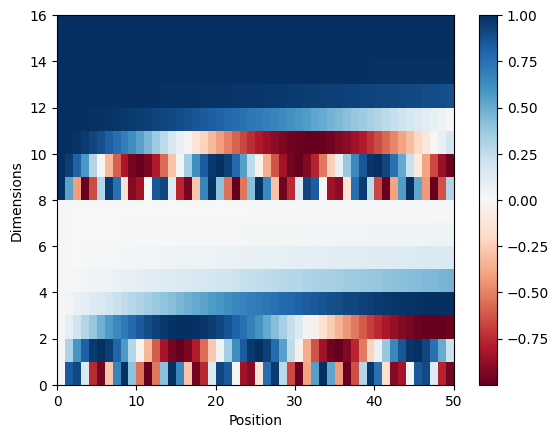

In [11]:
pos_encoding = positional_encoding(sequence_length=50, dimensions=16)

plt.pcolormesh(pos_encoding.T, cmap='RdBu')
plt.ylabel('Dimensions')
plt.xlabel('Position')
plt.colorbar()
plt.show()

We can see that the top 8 dimensions are the `sin()` values and the bottom 8 values are the `cos()` values. Each of the 8 dimensions has a different frequency which allows the model to look for other tokens using multiple scales of distance.

<br>

---

<br>

## **Section 3: Applications to Neuroscience**
<p align = "justify">Now that we have an understanding of how attention works, let's take a look at some specific examples of how transformers (and the concepts of self attention) have been applied to neuroscientific research. These examples are across 3 example data modalities, as one of the best ways to understand a new topic is to connect it with what you already know!</p>



### Sec 3.1: **fMRI**

#### [Semantic reconstruction of continuous language from non-invasive brain recordings](https://www.biorxiv.org/content/10.1101/2022.09.29.509744v1.full.pdf) (2022)

*Jerry Tang, Amanda LeBel, Shailee Jain, Alexander G. Huth*

<p align = "justify">This paper presents a novel brain-computer interface (BCI) that uses functional magnetic resonance imaging (fMRI) to decode continuous language. Unlike traditional BCIs, this new model doesn't require invasive procedures or limit itself to a pre-defined set of words. Instead, it generates a sequence of words that closely matches what the subject is hearing, imagining, or observing in silent videos. This is achieved by using a neural network model, specifically a Transformer model, which is a type of deep learning model well-suited for processing sequences of data.</p>

<p align = "justify">The researchers trained this model by having subjects listen to hours of spoken narrative stories while recording their brain activity with fMRI. The model learned to predict the fMRI response to different phrases in these stories. When decoding, the model generates candidate word sequences and scores them based on how likely they are to have evoked the recorded brain responses. The best sequence is then selected as the output. This approach allows the model to overcome the low temporal resolution of fMRI, which makes it challenging to link specific words with their corresponding brain images.</p>

<p align = "justify">The paper also highlights that the model can successfully decode language from different cortical networks, suggesting that these networks contain redundant information about language processing. The authors also demonstrate the practical applications of the model, such as reconstructing imagined speech and silent films, and show that the model can be consciously resisted, which has important privacy implications. Despite the complex deep learning techniques involved, the takeaway is that this approach has potential to develop non-invasive BCIs that could significantly aid communication for those with speech and language disorders.</p>
<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/huth_fmri_r.png" alt="inputs" width="1100"/>

> a.) *BOLD fMRI responses were recorded while three subjects listened to 16 h of narrative stories. An encoding model was estimated for each subject to predict brain responses from semantic features of stimulus words.* b.) *To reconstruct language from novel brain recordings, the decoder maintains a set of candidate word sequences. When new words are detected, a language model (LM) proposes continuations for each sequence and the encoding model scores the likelihood of the recorded brain responses under each continuation. The most likely continuations are retained.*

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/huth_decoded_words_r.png" alt="inputs" width="900"/>

> c.) *Decoders were evaluated on single-trial brain responses recorded while 5 subjects listened to test stories that were not used for model training. Segments from four test stories are shown alongside decoder predictions for one subject. The decoder exactly reproduces some words and phrases, and captures the gist of many more.*

---


<br>

### Sec 3.2: **Calcium**

#### [Spatial redundancy transformer for self-supervised fluorescence image denoising](https://www.biorxiv.org/content/biorxiv/early/2023/06/05/2023.06.01.543361.full.pdf) (2023)

By: *Xinyang Li, Xiaowan Hu, Xingye Chen, Jiaqi Fan, Zhifeng Zhao, Jiamin
Wu, Haoqian Wang, & Qionghai Dai*

<br>

<p align = "justify">This paper presents a new technique called the Spatial Redundancy Denoising Transformer (SRDTrans) to improve the quality of fluorescence microscopy images. Fluorescence microscopy, including techniques like calcium imaging, can be negatively affected by factors such as labeling concentration, brightness of the dye, and photobleaching. The noise introduced by these factors can make the resulting images difficult to interpret.</p>

<p align = "justify">The SRDTrans method is a self-supervised technique that improves image quality by reducing noise. Unlike previous methods, it doesn't rely on the similarity between consecutive frames but instead uses a "spatial redundancy sampling strategy." This means it uses data from the original image in two different orientations to train itself. SRDTrans is based on a network architecture known as a transformer, which unlike traditional methods, can maintain high resolution while using fewer computational resources.</p>

<p align = "justify">Applied to calcium imaging, the SRDTrans method was able to effectively reduce noise and recover structures that were previously hard to distinguish, such as soma, neurites, and vascular shadows. Importantly, it was also able to restore most of the frequency components that other methods lose, leading to better denoising performance. This indicates that SRDTrans could be a powerful tool for improving the quality of calcium imaging data, and potentially other fluorescence microscopy techniques as well.</p>
<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/SRDTrans_a_r.png" alt="inputs" width="1100"/>

> <p align = "justify">a.) <i>Self-supervised training strategy of SRDTrans. In a single instance of spatial redundancy sampling, the original low-SNR stack of H×W×T pixels is sampled by orthogonal masks, producing three downsampled sub-stacks (input, target 1, and target 2) of H/2×W/2×T pixels. The “input” sub-stack is fed into the transformer network, and the corresponding output is compared with the “target” sub-stacks to calculate the loss function for parameter optimization.</i></p>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/SRDTrans_c_r.png" alt="inputs" width="900"/>

> <p align = "justify">c.) <i>The architecture of the lightweight spatiotemporal transformer. It consists of a temporal encoder module, a spatiotemporal transformer block (STB), and a temporal decoder module. Each temporal encoder compresses the temporal scale (t) of the input by a factor of r (adjustable and set as 4 in this work) using convolution. In the STB module, the input is divided into small patches, and different feature maps of the same spatial position are stitched together in the patch flattening layer. The position embedding layer records the spatial position of each patch so that it can be mapped back after the global interaction in the multi-head self-attention layer. The self-attention mechanism can calculate the spatiotemporal correlation between all local patches. Then the output patches are remapped to their original spatial positions. The output of the STB module will be uncompressed to the original temporal scale by the following temporal decoder module. Multiple skip connections are configured to stabilize the training of the network.</i></p>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/SRDTrans_e_r.png" alt="inputs" width="900"/>

> <p align = "justify">e.) <i>Comparing the denoising performance of SRDCNN and SRDTrans on simulated calcium imaging data (30 Hz). Magnified views of boxed regions are shown at the top left of the images. Purple arrowheads point to a dendritic fiber. Scale bar, 40 μm for the whole field of view (FOV) and 10 μm for magnified views.</i></p>

---

<br>

### Sec 3.3: **Electrophysiology**

#### [Representation learning for neural population activity with Neural Data Transformers](https://arxiv.org/pdf/2108.01210.pdf) (2021)



By: *Joel Ye & Chethan Pandarinath*

<br>

<p align = "justify">On the electrophysiology side of things, the Neural Data Transformer (NDT) uses an encoder only transformer architecture like <a href="https://arxiv.org/abs/1810.04805">BERT</a> that takes in multi-electrode spiking activity, or simultaneously recorded action potentials ("spikes") from multiple neurons. NDT is does not have an explicit dynamics model like similar RNN-based models for analyzing spiking activity such as <a href="https://arxiv.org/pdf/1608.06315.pdf">LFADS</a>, information can flow throughout time anyway it pleases.</p>

<p align = "justify"> The authors argue that while Recurrent Neural Networks have been successfully used to model the dynamics of such neural spiking activities, Transformers could offer advantages such as faster training and processing speeds, particularly beneficial for real-time applications like brain-computer interfaces.</p>

<p align = "justify"> The NDT model is designed with unique attributes to adapt to the specific nature of spiking activity, which is distinct from the data that language transformers and other time series models usually handle. NDT is used to transform sequences of binned spiking activity into inferred firing rates. The transformer model, unlike the sequential nature of LFADS, processes all inputs together in layers, allowing it to avoid sequential bottlenecks. This paper details the training process for the NDT model, emphasizing the need for careful training decisions due to the typically small size of neuroscientific datasets.</p>
<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/NDT.png" alt="inputs" width="900"/>
<ol type="a">
  <li>The full architecture of the NDT model that you will be creating today.</li>
  <li>The input matrix, a multi-channel iBCI spike train. </li>
  <li>While NDT is based off of BERT, which uses no masking in the attention, NDT uses maked attention to limit how far forwards and backwards into time each token can attend to. The standard NDT model uses 2 attention heads.</li>
  <li>The output matrix, inferred firing rates.</li>
</ol>

---

<br>

## Section 4: Create a Neural Data Transformer

In this section we will be creating a simplified version of the Neural Data Transformer (previously discussed in [Sec. 3.3](#scrollTo=1mszyhViycxp&line=26&uniqifier=1)).

##### **Introductory Python / ML Terms:**

* <p align = "justify"><a href="https://uwpce-pythoncert.github.io/ProgrammingInPython/modules/SubclassingAndInheritance.html"><b><i>Subclass</b></i></a>: An object that gets to use all the functions defined in its "superclass". By creating a subclass you are saying: this Object is a <i>superclass</i>, but heres even more things that it can do that <i>superclass</i> can't.</p>

* <p align = "justify"><a href="https://www.linkedin.com/advice/3/what-benefits-drawbacks-batch-processing-ml-skills-batch-processing"><b><i>Batch</b></i></a>: A bunch of inputs being processed in parallel (at the same time) to speed up neural network training. Think of it like like an airport shuttle, and all the people need to make the same trip, it makes sense to load the shuttle with as many people as you can fit!</p>

* <p align = "justify"><a href="https://pytorch.org/docs/stable/nn.html#linear-layers"><b><i>Linear Layer</b></i></a>: A.K.A. a Fully-Connected Layer, is a matrix multiplication on the incoming data with a learned "weight" matrix and then addition with a learned "bias" term, or: $y = Wx + b$</p>

* <p align = "justify"><a href="https://pytorch.org/docs/stable/nn.html#normalization-layers"><t></t><b><i>Normalization</b></i></a>: A technique that standardizes or scales input data in order to prevent the model from being biased towards features with higher magnitudes. In a sense, it's a way to make sure that each input feature has the same level of importance for the learning algorithm.</p>

  - <p align = "justify">Transformers often use <a href="https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html"><b>Layer Normalization</b></a> (LayerNorm), where the mean and variance are computed independently for each input across all its features, adjusting and scaling the activations within the current layer. This is different from other normalization techniques such as Batch Normalization, which computes a single mean and variance for the entire batch.</p>


    
* <p align = "justify"><a href="https://pytorch.org/docs/stable/nn.html#dropout-layers"><t></t><b><i>Dropout</b></i></a>: A regularization technique where a proportion of the features in the inputs are randomly "dropped out" or set to zero during training. This prevents the model from overly relying on the exact presentation of any given feature, forcing the model to develop more robust representations.</p>

<br>


---

### Sec 4.1: **Feed Forward Layer**

<p align = "justify">The <a href="https://en.wikipedia.org/wiki/Feedforward_neural_network">Feed-Forward Network</a> (FFN) is a crucial part of the transformer architecture. It is applied independently to each token in the sequence, so this operation is highly parrallelizable (speeds up training and execution of the model because you can do it all tokens in one operation). The FFN consists of two linear layers and a non-linearity in between. It is essential for introducing non-linearity to the system and allowing the model to learn more complex representations. Despite its name, it doesn't carry information forward in terms of sequential data but instead contributes to the transformation of the input data within each individual layer.</p>

* Transformers often use the [rectified linear unit](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) (ReLU) as their choice of non-linearity, which just sets negative values to 0. Simple huh!

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/FFN.png" alt="inputs" width="900"/>
<br></br>

##### **Exercise**
Now let's implement the FFN using PyTorch. You will need to create a class called FeedForwardNetwork, which is a subclass of nn.Module.

**You need to provide the class with code to do two things:**
1. First to initialize the various PyTorch layers/functions to the requested sizes within the `__init__()` method of your class.
2. Then, to transform the incoming data using those layers/functions within the `forward()` method of your class.

**The FFN class should have the following parameters:**
- `self.norm` ([`nn.LayerNorm`](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html#layernorm)): normalizes data of shape `input_dim`
- `self.linear1` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `input_dim` to `hidden_dim`
- `self.relu` ([`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)): activation function
- `self.dropout` ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout)): zeros out features with a `dropout_p` probability
- `self.linear2` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `hidden_dim` to `input_dim`

> **⚠️&nbsp;&nbsp;WARNING: Make sure you use the variable names defined above!**


Next, within the `forward()` method, you are to define the forward pass for this network.
<br>
**This method should:**
1. Pass the input `x` through the LayerNorm
2. Pass the output of (1) through the first linear layer
3. Pass the output of (2) through the ReLU activation
4. Pass the output of (3) through the dropout layer
5. Pass the output of (4) through the second linear layer

Use the following code snippet as your starting point:

In [12]:
class FeedForwardLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim, dropout_p):
        super().__init__()
        self.norm = nn.LayerNorm(input_dim)
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement `self.linear1`
        # TODO: Implement `self.relu`
        # TODO: Implement `self.dropout`
        # TODO: Implement `self.linear2`
# ---------------------------------------------------------------------------- #
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_p)
        self.linear2 = nn.Linear(hidden_dim, input_dim)
# ---------------------------------------------------------------------------- #



    def forward(self, x):
        x = self.norm(x) # pass through LayerNorm
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement the rest of the forward pass
# ---------------------------------------------------------------------------- #
        x = self.linear1(x) # pass through first linear layer
        x = self.relu(x) # pass through ReLU activation function
        x = self.dropout(x) # pass through dropout layer
        out = self.linear2(x) # pass through second linear layer
# ---------------------------------------------------------------------------- #
        return out # return the output of the second linear layer

After you finish creating the class, run the cell and continue to the next section.

---

### Sec 4.2: **Multi-head Attention Layer**

<p align = "justify">The Multi-Head Attention (MHA) is the source of novelty for the transformer architecture. It's designed to simultaneously attend to information at different positions from different subspaces. The MHA mechanism splits the input into multiple "heads", then applies the attention mechanism independently to each head before concatenating the results.</p>

<p align = "justify">The attention mechanism is a way to weight the input values based on their relevance to a query. This allows the model to focus on the most important parts of the input for each specific task. The MHA allows the model to have multiple such focus points.</p>

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/MHA.png" alt="inputs" width="900"/>
<br></br>

##### **Exercise**

Now let's implement the MHA using PyTorch. You will need to create a class called MultiHeadAttention, which is a subclass of nn.Module.

**You need to provide the class with code to do two things:**

1. First, to initialize the various PyTorch layers/functions to the requested sizes within the `__init__()` method of your class.
2. Then, create the attention() method, which will compute the scaled dot product attention.
3. Finally, transform the incoming data using the method/layers/functions within the `forward()` method of your class.


**The MHA class should have the following parameters:**
- `self.norm` ([`nn.LayerNorm`](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html#layernorm)): normalizes the data with shape `input_dim`
- `self.dropout` ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout)): has a `dropout_p` probability of an element to be zeroed
- `self.linear_q` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `input_dim` to `self.all_head_dims`, does not use a bias (set optional `bias` parameter to `False`)
- `self.linear_k` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `input_dim` to `self.all_head_dims`, does not use a bias (set optional `bias` parameter to `False`)
- `self.linear_v` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `input_dim` to `self.all_head_dims`, does not use a bias (set optional `bias` parameter to `False`)
- `self.linear_out` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): transforms the input dimensions from `self.all_head_dims` to `input_dim`

<br>

To start, define the `attention()` function for this network to compute scaled dot product attention.
<br>

**This method should:**

1. Transpose `key` tensors in the last two dimensions using [`torch.transpose()`](https://pytorch.org/docs/stable/generated/torch.transpose.html) (you can use a negative index to indicate number of points from the end, so -1 would mean the last dimension)
2. Compute attention scores by performing matrix multiplication (via: [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html)) between the `query` and the transposed `key` tensors.
3. Normalize the attention scores by dividing them by the square root of the number of dimensions in each head.
4. Add the `attn_mask` to the attention scores tensor.
5. Apply the [`F.softmax()`](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html) function along the last dimension (-1) to obtain the attention weights.
6. Apply dropout to the attention weights tensor.
7. Compute the final output by performing matrix multiplication between the attention weights and the value tensor.
8. Return the result.

Next, within the `forward()` method, you are to finish defining the forward function.
<br>

**You need to:**

1. Pass `x` through the 3 linear layers to get the queries, keys, and values.
2. Pass the queries, keys, and values (& attention mask) through the attention function
5. Transpose the result in first two dimensions
6. Prepare data for final linear layer
7. Pass the output through the final linear layer
8. Reshape the output to match the input dimensions

Use the following code snippet as your starting point:



In [13]:
class MultiHeadAttention(nn.Module):
    def __init__(self, input_dim, num_heads, head_dims, dropout_p):
        super().__init__()
        self.head_dims = head_dims
        self.num_heads = num_heads
        self.all_head_dims = head_dims * num_heads
        # the scaling for the scaled dot product attention
        self.dpa_demon = math.sqrt(self.head_dims)

# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement `self.norm`
        # TODO: Implement `self.dropout`
        # TODO: Implement `self.linear_q` (NOTE: make sure not to use a bias!)
        # TODO: Implement `self.linear_k` (NOTE: make sure not to use a bias!)
        # TODO: Implement `self.linear_v` (NOTE: make sure not to use a bias!)
        # TODO: Implement `self.linear_out`
# ---------------------------------------------------------------------------- #
        self.norm = nn.LayerNorm(input_dim)
        self.dropout = nn.Dropout(dropout_p)

        self.linear_q = nn.Linear(input_dim, self.all_head_dims, bias=False)
        self.linear_k = nn.Linear(input_dim, self.all_head_dims, bias=False)
        self.linear_v = nn.Linear(input_dim, self.all_head_dims, bias=False)

        self.linear_out = nn.Linear(self.all_head_dims, input_dim)
# ---------------------------------------------------------------------------- #

    def attention(self, query, key, value, attn_mask):
        # shape of query, key, & value:
        #  [(batch_size * n_heads) x time x head_dim]

# ----------------------------- Student Section ------------------------------ #
        # TODO: First, transpose the `key` tensor using `torch.transpose()` to
        #       get the key into shape:
        #         [(batch_size * n_heads) x head_dim x time]
        # TODO: Get the attention scores, by performing matrix multiplication
        #       (`torch.matmul()`), between `query` and `key`
        # TODO: Divide the attention acores by `denom`
        # TODO: Add the `attn_mask` to the attention scores
        # TODO: Apply `F.softmax()` to the attn_scores on the last dimension to
        #       get the attention weights
        # TODO: Apply dropout attention weights
        # TODO: Get the result, by performing matrix multiplication
        #       (`torch.matmul()`), attention weights and `value`
# ---------------------------------------------------------------------------- #
        key = key.transpose(-1, -2)
        attn_scores = torch.matmul(query, key)
        denom = math.sqrt(self.head_dims)
        attn_scores /= denom
        attn_scores += attn_mask
        attn = F.softmax(attn_scores, dim=-1)
        attn = self.dropout(attn)
        result = torch.matmul(attn, value)
# ---------------------------------------------------------------------------- #
        return result

    def forward(self, x, attn_mask=None):
        # input shape: [B x T x N]
        batch_size, seq_len, n_electrodes = x.size()

        # shape: [B x T x N] -> [T x B x N]
        x = x.transpose(0,1)

        # pass the input through the LayerNorm
        x = self.norm(x)

# ----------------------------- Student Section ------------------------------ #
        # TODO: Pass the input through the linear layers to get the queries,
        #       keys, and values to transform their shape from: [T x B x N],
        #       into: [T x B x (n_heads * head_dims)]
# ---------------------------------------------------------------------------- #
        query = self.linear_q(x)
        key = self.linear_k(x)
        value = self.linear_v(x)
# ---------------------------------------------------------------------------- #

        # reshape the queries, keys, and values:
        # [T x B x (n_heads * head_dims)] -> [(B * n_heads) x T x head_dim]
        transform = lambda x: x.contiguous().view(
            seq_len, batch_size*self.num_heads, self.head_dims).transpose(0,1)
        query, key, value = map(transform, [query, key, value])

        # each sample in the batch needs an attention mask, repeat it
        attn_mask = attn_mask.repeat((batch_size*self.num_heads, 1, 1))

# ----------------------------- Student Section ------------------------------ #
        # TODO: Pass the `query`, `key`, `value`, and `attn_mask` through the
        #       attention function you just created and store the result in a
        #       variable named `x`
        # TODO: Transpose via: `torch.transpose()` to go from shape:
        #       [(B * n_heads) x T x head_dims] -> [T x (B * n_heads) x head_dims]
# ---------------------------------------------------------------------------- #
        x = self.attention(query, key, value, attn_mask)
        x = x.transpose(0, 1)
# ---------------------------------------------------------------------------- #
        # prepare data for final linear layer, shape: [(T * B) x (n_heads * head_dims)]
        x = x.contiguous().view(seq_len * batch_size, self.all_head_dims)
# ----------------------------- Student Section ------------------------------ #
        # TODO: Pass the output through the final linear layer, to go from
        #       shape: [(T * B) x (n_heads * head_dims)] -> [(T * B) x N]
# ---------------------------------------------------------------------------- #
        x = self.linear_out(x)
# ---------------------------------------------------------------------------- #

        # reshape: [(T * B) x N] -> [B x T x N]
        x = x.view(seq_len, batch_size, n_electrodes).transpose(0,1)

        return x

After you finish creating the class, run the cell and continue to the next section.

---

### Sec 4.3: **Encoder Layer**

The Encoder Layer is a building block of the Transformer Encoder. Each encoder layer includes two main parts: a multi-head attention (MHA) mechanism, and a feed forward network (FFN). The input goes through the MHA first, and then the output of MHA is passed to the FFN. There are residual connections and dropout is also applied after the MHA and the FFN.

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/Encoder.png" alt="inputs" width="900"/>
<br></br>

##### **Exercise**

Now let's implement the EncoderLayer using PyTorch. You will need to create a class called EncoderLayer, which is a subclass of nn.Module.

You need to provide the class with code to do two things:

1. First to initialize the various PyTorch layers/functions to the requested sizes within the __init__ method of your class.
2. Then, to transform the incoming data using those layers/functions within the forward method of your class.


The EncoderLayer should consist of:

- `self.MHA` ([`MultiHeadAttention`](#scrollTo=v5FBY600ry2w&line=3&uniqifier=1)): takes in the requested items from the `config_dict`
- `self.FFN` ([`FeedForwardLayer`](#scrollTo=QlHYDUI7ry2w&line=12&uniqifier=1)): takes in the requested items from the `config_dict`
- `self.post_mha_dropout` ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout)): has a `config_dict['mha_dropout_p']` probability of an element to be zeroed
- `self.post_ffn_dropout` ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout)): has a `config_dict['ffn_dropout_p']` probability of an element to be zeroed

<br>

Next, within the `forward()` method, you are to define the forward pass for this network.
<br>
**This method should:**

1. Store the input `x` in variable named `residual`
2. Pass the output of (1) through the MHA
3. Pass the output of (2) through the dropout
4. Add the `residual` to the output of (3)
5. Store the output of (4) in variable named `residual`
6. Pass the output of (5) through the FFN
7. Pass the output of (6) through the dropout
8. Add the `residual` to the output of (7)
9. Return the output of (8)

Use the following code snippet as your starting point:

In [14]:
class EncoderLayer(nn.Module):
    def __init__(self, config_dict):
        super().__init__()
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement `self.MHA` with the following parameters:
        #         input_dim = config_dict['factor_dim'],
        #         num_heads = config_dict['n_heads'],
        #         head_dims = config_dict['head_dims'],
        #         dropout_p = config_dict['mha_dropout_p']
        # TODO: Implement `self.FFN` with the following parameters:
        #         input_dim = config_dict['factor_dim'],
        #         hidden_dim = config_dict['ffn_dim'],
        #         dropout_p = config_dict['ffn_dropout_p']
        # TODO: Implement `self.post_mha_dropout`
        # TODO: Implement `self.post_ffn_dropout`
# ---------------------------------------------------------------------------- #
        self.MHA = MultiHeadAttention(
            config_dict['factor_dim'],
            config_dict['n_heads'],
            config_dict['head_dims'],
            config_dict['mha_dropout_p']
        )
        self.FFN = FeedForwardLayer(
            config_dict['factor_dim'],
            config_dict['ffn_dim'],
            config_dict['ffn_dropout_p']
        )
        self.post_mha_dropout = nn.Dropout(config_dict['mha_dropout_p'])
        self.post_ffn_dropout = nn.Dropout(config_dict['ffn_dropout_p'])
# ---------------------------------------------------------------------------- #


    def forward(self, x, attn_mask=None):
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement the forward pass
# ---------------------------------------------------------------------------- #
        residual = x
        x = self.MHA(x, attn_mask)
        x = self.post_mha_dropout(x)
        x = x + residual

        residual = x
        x = self.FFN(x)
        x = self.post_ffn_dropout(x)
        x = x + residual
# ---------------------------------------------------------------------------- #
        return x

After you finish creating the class, run the cell and continue to the next section.

---


### Sec 4.4: **The Full Model**

<p align = "justify">The full <b>Neural Data Transformer Model</b> extends the single layer architecture discussed in the previous section to a full transformer model with multiple layers. This model's structure includes a positional embedding layer, a multi-layer encoder stack, and an output layer that maps the transformed factors back to the electrode space.</p>

<p align = "justify">The positional embedding layer is necessary because the transformers, by design, do not understand the order of tokens (electrodes in our case). This positional embedding layer adds information about the token's position in the sequence to the token embeddings themselves.</p>

<p align = "justify">The transformer encoder stack is a sequence of multiple identical layers, each containing two sub-layers: a multi-head self-attention mechanism and a simple, position-wise fully connected feed-forward network.In the output layer, we project back the factors to the original space of the electrodes. When training, this model also calculates the Poisson log-likelihood loss based on the original and the predicted spikes. In addition, it implements dropout regularization to prevent overfitting.</p>

<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/full_model.png" alt="inputs" width="1000"/>
<br></br>

##### **Exercise**
Now let's implement the Full Neural Data Transformer Model using PyTorch. You will need to create a class called NeuralDataTransformer, which is a subclass of nn.Module.

**You need to provide the class with code to do two things:**
1. First to initialize the various PyTorch layers/functions to the requested sizes within the `__init__` method of your class.
2. Then, to transform the incoming data using those layers/functions within the `forward()` method of your class.

<b>You will need to implement the following parameters of the NeuralDataTransformer:</b>
- `self.readin` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): An input layer that reduces dimensionality from `n_electrodes` to `factor_dim`.
- `self.readout` ([`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)): An input layer that increase dimensionality from `factor_dim` to `n_electrodes`.
- `encoder_layer_list` (list of `EncoderLayer`s): fill the list with the same number of `EncoderLayer` objects as there are layers, we will pass the input through each item in this list to pass the input through the different "layers".
<br>

Next, within the `forward()` method, you are to define the outlined steps for this layer.
<br>
**You should:**

1. Pass the input `x` through the readin
2. Pass the output of (1) through the post readin dropout layer
3. Add the positional embedding (`self.pos_embedding`) to the output of (2)
4. Pass the output of (3) through the post embedding dropout layer
5. Pass the output of (4) through the encoder layer with the attention mask
6. Pass the output of (5) through the normalization layer
7. Pass the output of (6) through the dropout layer
8. Pass the output of (7) through the readout layer

Use the following code snippet as your starting point:

In [15]:
class NeuralDataTransformer(nn.Module):
    def __init__(self, config_dict):
        super().__init__()
        # layers of the model
        self.config_dict = config_dict
        self.context_forward = config_dict['context_forward']
        self.context_backward = config_dict['context_backward']
        encoder_layer_list = []
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement `self.readin`
        # TODO: Implement `self.readout`
        # TODO: create a list of `EncoderLayer()` objects by adding a new object
        #       to the list for each layer (`config_dict['n_layers']` in total)
# ---------------------------------------------------------------------------- #
        self.readin = nn.Linear(config_dict['n_electrodes'], config_dict['factor_dim'])
        self.readout = nn.Linear(config_dict['factor_dim'], config_dict['n_electrodes'])
        encoder_layer_list = [EncoderLayer(config_dict) for _ in range(config_dict['n_layers'])]
# ---------------------------------------------------------------------------- #
        self.encoder = nn.ModuleList(encoder_layer_list)

        # transform data
        self.norm = nn.LayerNorm(config_dict['factor_dim'])
        self.scale = torch.sqrt(torch.FloatTensor([config_dict['factor_dim']]))
        self.pos_embedding = nn.Parameter(torch.zeros(config_dict['seq_len'], config_dict['factor_dim']))

        # for training
        self.classifier = nn.PoissonNLLLoss(reduction='none')
# ----------------------------- Student Section ------------------------------ #
        # TODO: Implement `self.post_embedding_dropout`
        # TODO: Implement `self.post_readin_dropout`
        # TODO: Implement `self.post_encoder_dropout`
# ---------------------------------------------------------------------------- #
        self.post_embedding_dropout = nn.Dropout(config_dict['post_embedding_dropout_p'])
        self.post_readin_dropout = nn.Dropout(config_dict['post_readin_dropout_p'])
        self.post_encoder_dropout = nn.Dropout(config_dict['post_encoder_dropout_p'])
# ---------------------------------------------------------------------------- #

        # init
        self.readout.bias.data.zero_()
        self.readout.weight.data.uniform_(-0.01, 0.01)
        self.readin.weight.data.uniform_(-0.01, 0.01)
        self.pos_embedding.requires_grad = True
        nn.init.xavier_uniform_(self.pos_embedding)

        # cache for training
        self.attn_mask = None
        self.zero_prob_mask = None
        self.loss_prob_mask = None
        self.random_prob_mask = None

    def forward(self, x, labels=None):
# ----------------------------- Student Section ------------------------------ #
        # TODO: Pass `x` through the readin
        # TODO: Pass `x` through the post readin dropout layer
# ---------------------------------------------------------------------------- #
        x = self.readin(x)
        x = self.post_readin_dropout(x)
# ---------------------------------------------------------------------------- #

        # scale the inputs so that the positional embedding doesn't "overpower" data
        x *= self.scale.to(x.device)

# ----------------------------- Student Section ------------------------------ #
        # TODO: Add the positional embedding to `x`
        # TODO: Pass `x` through the post readin dropout layer
# ---------------------------------------------------------------------------- #
        x = x + self.pos_embedding
        x = self.post_embedding_dropout(x)
# ---------------------------------------------------------------------------- #

        # get the attention mask
        attn_mask = self.get_attn_mask(x)

# ----------------------------- Student Section ------------------------------ #
        # pass through each of the encoder layers
        for encoder_layer in self.encoder:
            attn_mask = attn_mask.to(x.device)
            # TODO: Pass `x` through the encoder layer
        # TODO: Pass `x` through the normalization layer
        # TODO: Pass `x` through the post encoder dropout layer
        # TODO: Pass `x` through the readout
# ---------------------------------------------------------------------------- #
            x = encoder_layer(x, attn_mask)
        x = self.norm(x)
        x = self.post_encoder_dropout(x)
        x = self.readout(x)
# ---------------------------------------------------------------------------- #

        # if we are not training then there is no loss, return the rates
        if labels == None:
            return torch.exp(x)

        # if we are training, then get the loss
        loss = self.classifier(x, labels)

        # only backprop loss from the masked samples
        masked_loss = loss[labels != -100]

        # get a single value
        masked_loss = masked_loss.mean()

        # return both loss and rates
        return masked_loss, torch.exp(x)

    def get_attn_mask(self, src):
        ''' Ignore this. '''
        # use cached version if already created.
        if self.attn_mask != None:
            return self.attn_mask

        ones = torch.ones(src.size(1), src.size(1), device=src.device)
        forw_mask = (torch.triu(ones, diagonal=-self.context_forward) == 1).transpose(0, 1)
        back_mask = (torch.triu(ones, diagonal=-self.context_backward) == 1)
        mask = (forw_mask & back_mask).float()
        mask = mask.masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        mask = mask.unsqueeze(0)
        self.attn_mask = mask # cache the mask

        return mask

    def preprocess_batch(self, batch, heldout_spikes, forward_spikes):
        ''' Ignore this. '''
        batch = batch.clone()
        labels = batch.clone()
        loss_ratio = self.config_dict['loss_ratio']

        # Which indicies shold the loss be computed with
        if self.loss_prob_mask is None or self.loss_prob_mask.size() != labels.size():
            timestep_shape = labels[:, :, 0].shape # N x T
            self.loss_prob_mask = torch.full(timestep_shape, loss_ratio, device=batch.device, dtype=torch.float32)
        loss_mask = torch.bernoulli(self.loss_prob_mask)
        loss_mask = loss_mask.bool().unsqueeze(2).expand_as(labels)
        labels[~loss_mask] = -100

        # Zero mask
        if self.zero_prob_mask is None or self.zero_prob_mask.size() != labels.size():
            zero_mask_ratio = self.config_dict['mask_ratio']
            self.zero_prob_mask = torch.full(labels.shape, zero_mask_ratio, device=batch.device, dtype=torch.float32)
        indices_zero_masked = torch.bernoulli(self.zero_prob_mask).bool() & loss_mask
        batch[indices_zero_masked] = 0

        # Randomize
        if self.random_prob_mask is None or self.random_prob_mask.size() != labels.size():
            randomize_ratio = self.config_dict['random_ratio']
            self.random_prob_mask = torch.full(labels.shape, randomize_ratio, device=batch.device, dtype=torch.float32)
        indices_randomized = torch.bernoulli(self.random_prob_mask).bool() & loss_mask & ~indices_zero_masked
        random_spikes = torch.randint(batch.max().long(), labels.shape, dtype=torch.long, device=batch.device)
        batch[indices_randomized] = random_spikes.float()[indices_randomized]

        # Add zeros for heldout and forward
        batch = torch.cat([batch, torch.zeros_like(heldout_spikes)], -1)
        labels = torch.cat([labels, heldout_spikes], -1)
        batch = torch.cat([batch, torch.zeros_like(forward_spikes)], 1)
        labels = torch.cat([labels, forward_spikes], 1)

        return batch, labels

---

## Section 5: Model Training & Evaluation

##### **Introductory ML Terms:**

* <p align = "justify"><a href="https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss"><b><i>Loss</b></i></a>: a numerical measure of how far the model's predictions are from the actual values, used during training to guide the improvement of the model. This value is determined by the <i>loss function</i>. For training the NDT model we will be using the Negative log likelihood loss (with a Poisson distribution of target) or <a href="https://pytorch.org/docs/stable/generated/torch.nn.PoissonNLLLoss.html"><code>nn.PoissonNLLLoss()</code></a> between the inferred firing rates of the neurons and the true spiking activity of the neurons.</p>

* <p align = "justify"><a href="https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a"><b><i>Batch</b></i></a>: a subset of the dataset that is used for training the model in a single step. The model's parameters are updated after each batch. Batch size is a crucial hyperparameter that affects the model's performance and speed of training.</p>

* <p align = "justify"><a href="https://www.geeksforgeeks.org/epoch-in-machine-learning/"><b><i>Epoch</b></i></a>: an epoch is one complete pass through the all of the batches (the entire training dataset) during the training process.</p>

* <p align = "justify"><a href="https://www.kdnuggets.com/2021/03/machine-learning-learning-rate.html"><b><i>Learning Rate</b></i></a>: the learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.</p>
* <p align = "justify"><a href="https://www.deeplearningbook.org/contents/optimization.html"><b><i>Optimizer</b></i></a>: the optimization algorithm used to update the weights of the model based on the gradients of the loss function. Examples of optimizers are Stochastic Gradient Descent (SGD), Adam, and RMSprop.</p>

#### **MC Maze Dataset**:

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/maze.png" alt="inputs" width="1100"/>

> *Example of the 4 stages in the delayed center out reaching task.*
<br>

- <p align = "justify">The <code>MC_Maze</code> dataset includes neural activity recorded from the primary motor and dorsal premotor cortices of a macaque performing a delayed center-out reach task in various maze configurations. This task results in a variety of straight and curved trajectories, and the predictability of the neural activity during these highly-stereotyped movements makes the dataset useful for evaluating a model's ability to represent autonomous dynamics.</p>

- <p align = "justify">The dataset that we will be using today, <code>MC_Maze_Small</code>, is a variant of the <code>MC_Maze</code> dataset with a limited number of trials, designed to assess how modeling methods scale to datasets with restricted amounts of data.</p>

- <p align = "justify">This data was collected by Krishna Shenoy, Mark Churchland, and Matt Kaufman from Stanford University. If you are interested in learning more about the dataset,  check out <a href="https://github.com/neurallatents/neurallatents.github.io/blob/master/notebooks/mc_maze.ipynb">this</a> wonderful notebook by Felix Pei that breaks down the specifics of the dataset. </p>

<br>

<p align = "justify">The main goal of the benchmark is to <b>predict the activity (firing rates) of a set of ("held-out") neurons, given the activity of another set of ("held-in") neurons</b>. Secondary goals include the prediction of future timesteps (how would the activity of both the held-in and held-out neurons continue to evolve), and how well the kinematics can be linearly decoded from the predicted firing rates.</p>

<br>

---


### Sec 5.1: **Process the Data**

Let's now import the data we downloaded during the setup. The format used is [NWB](https://nwb-overview.readthedocs.io/en/latest/intro_to_nwb/1_intro_to_nwb.html). We will resample the data to 5ms bins.

In [16]:
# curr_path = os.getcwd()
# os.listdir(curr_path)

## Get the current path and pull the dataset into the Neurodata Without Borders format
fpath = '/content/000140/sub-Jenkins'
dataset = NWBDataset(fpath=fpath)
dataset.resample(5)

Now we will get the dataloaders, `utils.get_dataloaders()` uses functions created for the NLB to extract and process the data. The function can be found [here](https://github.com/domenick-m/Caltech_DSAINSS_23/blob/main/utils.py).

In [17]:
device = torch.device('cuda')
dataloaders = utils.get_dataloaders(dataset, device)

### Sec 5.2: **Model Training**

We will now begin the training process. We first need to initialize the model, we do that using a configuration file that defines all of our hyperparameters. It is common to use the dictionary structure for this as it allows you to store mulitple type of variables using strings to access them!

In [18]:
config_dict = dict(
    n_electrodes = 142,
    seq_len = 180,

    n_layers = 4,
    n_heads = 2,
    factor_dim = 64,
    head_dims = 32,
    ffn_dim = 128,
    context_forward = 15,
    context_backward = 35,

    post_readin_dropout_p = 0.2,
    post_embedding_dropout_p = 0.7,
    post_encoder_dropout_p = 0.2,
    mha_dropout_p = 0.5,
    ffn_dropout_p = 0.3,

    loss_ratio=0.4,
    mask_ratio=0.75,
    random_ratio=1.0,
    weight_decay = 0.000005,
    lr_init = 0.005,
    n_epochs=2500,
)


We can now initialize the model, and create the optimizer for training.

In [19]:
model = NeuralDataTransformer(config_dict)

optimizer = torch.optim.AdamW(model.parameters(),
                              lr = config_dict['lr_init'],
                              weight_decay = config_dict['weight_decay'])


We set the seeds so that we can get more repeatable results, it is not 100% deterministic as it slows down training significantly.

In [20]:
utils.set_seeds(12345)

Now the full training loop. We have it set to 2500 epochs and this should take around 2 minutes to complete.

In [21]:
# initialize lists to keep track of the losses
losses, eval_losses = [], []

# move the model to the GPU where the computations will be performed.
model = model.to(device)

# create progress bars for visualization during training
prog_bar, loss_bar = utils.get_prog_bars(config_dict['n_epochs'])

# the main training loop. we run for a certain number of epochs.
for epoch in prog_bar:
    # set the model to training mode. this affects certain operations which behave differently during train vs evaluation.
    model.train()

    # load data from the training set.
    for heldin, recon, vel, conds in dataloaders['train']:
        # preprocess the batch data using a model's specific function.
        batch, labels = model.preprocess_batch(
            heldin,
            recon[:, :140, 107:],
            recon[:, 140:, :]
        )

        # forward pass through the model. the model returns a loss and the reconstructed output.
        loss, reconstructed = model(batch, labels)

        # compute gradients based on the loss
        loss.backward()

        # update model parameters using computed gradients
        optimizer.step()

        # reset gradients to zero for the next batch
        optimizer.zero_grad(set_to_none=True)

        # detach loss from computation graph and move it to cpu for storage
        batch_loss = loss.detach().cpu().numpy()

        # save the loss for this batch
        losses.append([epoch, batch_loss])

    # switch model to evaluation mode.
    model.eval()

    # every 2 epochs, evaluate model on validation set.
    if np.mod(epoch, 2)==0:
        # list to store losses for each batch in the current epoch
        epoch_eval_loss = []

        # load data from the validation set
        for heldin, recon, vel, conds in dataloaders['val']:
            # ensure that no gradients are calculated since we're not training
            with torch.no_grad():
                spikes = torch.zeros_like(recon)
                spikes[:, :140, :107] = heldin

                # forward pass
                loss, reconstructed = model(spikes, recon)

                # append the current batch's loss to the list
                epoch_eval_loss.append(loss.cpu().numpy())

        # compute mean validation loss for the epoch
        mean_loss = np.mean(epoch_eval_loss)

        # save the mean validation loss for this epoch
        eval_losses.append([epoch, mean_loss])

        # update the description of the loss bar with latest training and validation loss
        loss_bar.set_description_str(f"[train loss: {batch_loss:.4f}]   [val loss: {mean_loss:.4f}]")

# close the progress bars after training
prog_bar.close()
loss_bar.close()


Epochs: 0 / 2500              0% - ETR:?

While your model is training, let's break down some of the model training code more...

In Pytorch, the typical model training routine includes several steps:

1. **Sending the model to a device**: `model = model.to(device)`. This is usually done to transfer the model to the GPU, if available, for faster computations.

2. **Setting the model to training mode**: `model.train()`. This ensures that certain layers of the model, like dropout layers, behave differently during training and evaluation.

3. **Loading batches of data**: `for heldin, recon, vel, conds in dataloaders['train']:`. This loop iterates through batches of data in the training set.

4. **Preprocessing the batch**: `batch, labels = model.preprocess_batch(...)`. Depending on the model and the task, preprocessing might involve various steps like reshaping the data, converting data types, or normalizing values.

5. **Forward pass**: `loss, reconstructed = model(batch, labels)`. This step runs the model on the input data and computes the loss.

6. **Backward pass**: `loss.backward()`. This computes the gradients of the loss with respect to the model parameters.

7. **Parameter update**: `optimizer.step()`. This updates the model parameters using the computed gradients.

8. **Zeroing the gradients**: `optimizer.zero_grad(set_to_none=True)`. This clears the gradients for the next iteration.

9. **Validation**: The block of code under `model.eval()` is where the validation occurs. This is similar to the training loop but does not include the backward pass or parameter update steps, because the model is not updated during validation.

10. **Logging**: Throughout this process, various metrics like the training and validation losses are logged for analysis.

Now, once the model finishes training let's take a look at the loss.


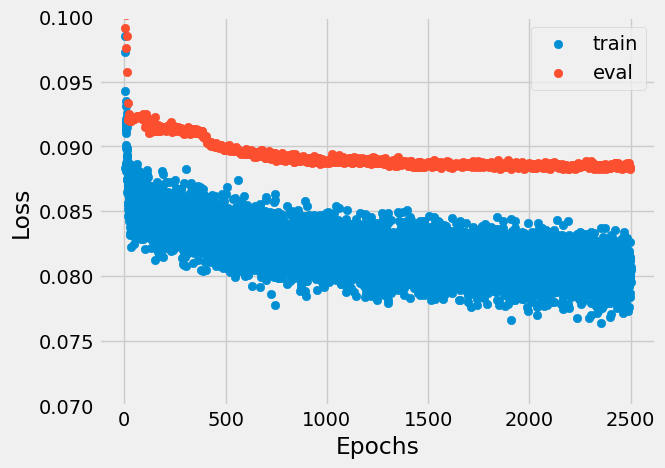

In [22]:
# split the lists into the epoch number and the loss
losses_0, losses_1 = np.array(losses).T
eval_losses_0, eval_losses_1 = np.array(eval_losses).T

# The rest of the code sets up the plot.
plt.style.use('fivethirtyeight')
plt.scatter(losses_0, losses_1, label='train')
plt.scatter(eval_losses_0, eval_losses_1, label='eval')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0.07, 0.1) # we manually set the limits, if you cannot see your loss remove this line
plt.show()

---

### Sec 5.3: **Model Evaluation**

Now that we have our trained model, we should look at how the models predictions of the firing rates compare to simply smoothing the spikes. Before we do that however, let's briefly take a closer look at the dataset (`mc_maze_small`) that we have been using so far. To do that, we will first "trialize" the continous data by taking a range (in our case 250 ms before to 450 ms after) around a key event in each trial, we will be using movement onset (when the monkeys hand starts moving) as that event.

In [23]:
# split the data up into trials aligned to the movement onset
trial_data = dataset.make_trial_data(align_field = "move_onset_time", align_range = (-250, 450))
trial_data = utils.add_conds_to_trial_data(trial_data_in= trial_data, dataset_in= dataset)

# get the trialized conditions, held-in spikes, hand velocities, and hand positions
grouped = list(trial_data.groupby('trial_id', sort=False))
conds = np.stack([trial["trial_cond"].to_numpy() for _, trial in grouped])[:,0]
heldin = torch.tensor(np.stack([trial['spikes'].to_numpy() for _, trial in grouped]))
vel = torch.tensor(np.stack([trial['hand_vel'].to_numpy() for _, trial in grouped]))
pos = torch.tensor(np.stack([trial['hand_pos'].to_numpy() for _, trial in grouped]))

Let's take a look at all the trials in some exanple conditions to see what the reaches actually look like for the first 325 ms after movement onset.

In [24]:
cond_list = [1, 4, 7, 13] # example conditions to plot, feel free to change

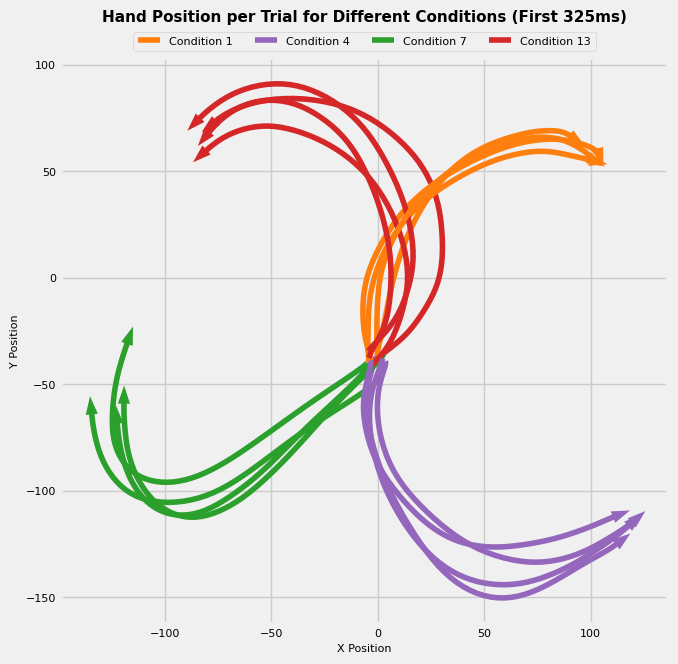

In [25]:
utils.plot_hand_vel(cond_list, pos, conds)

Great! Now let's take a look at the binned spikes and the monkeys hand velocity across time for one of the trials. Take a minute to see if you can find any obvious relationships between the neural activity and kinematics:

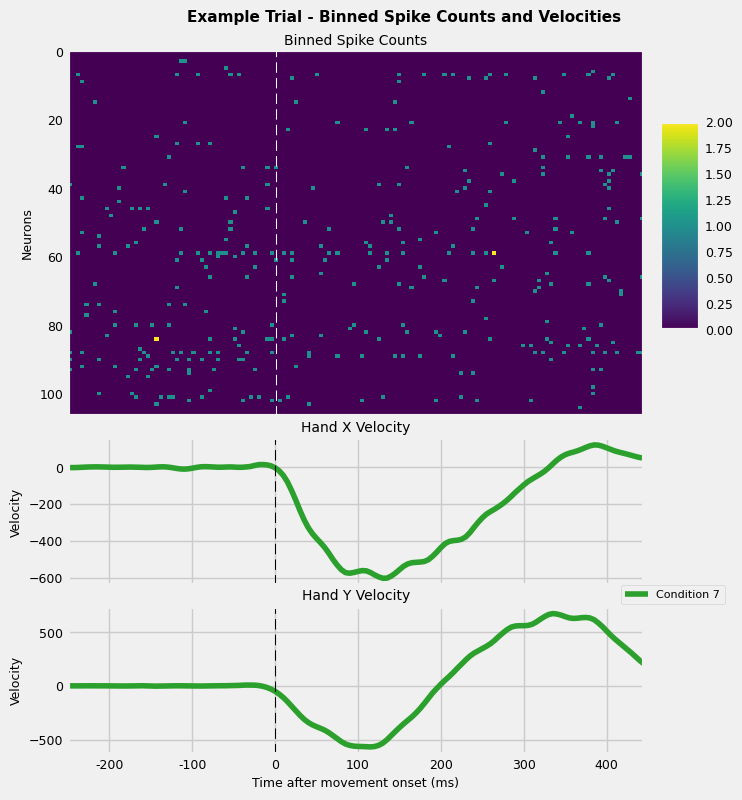

In [26]:
trial_id = 5
utils.plot_ex_spikes_vel(heldin, vel[trial_id,:140], trial_id, conds[trial_id])

Looking at <i>just</i> the spikes, it is very difficult to find any meaningful patterns.

To get a better picture of how a neurons activity relates to the hand kinematics, we first need to get an estimate of the instantaneous firing rates for all the neurons. We can do that by smoothing with a Gaussian filter. Smoothing however cannot fix the fact that spikes are inherintley a noisy estimate of the underlying firing rates. If we have enough repeated trials of the same conditions, we can average out some of this noise by taking the mean of the smoothed spiking activity across all those trials. This is referred to as a *Peristimulus time histogram* (PSTH).

First we can set the amount of smoothing we want as well as the example neurons:

In [27]:
kernel_size =  10 # number of 5ms bins in filter to smooth with
neuron_list = [1, 3, 19, 23, 25, 27, 31, 53, 59, 68, 69, 76, 84, 87, 101]

Let's now create PSTHs of our smoothed binned spikes for 15 example neurons (using the example conditions from earlier):

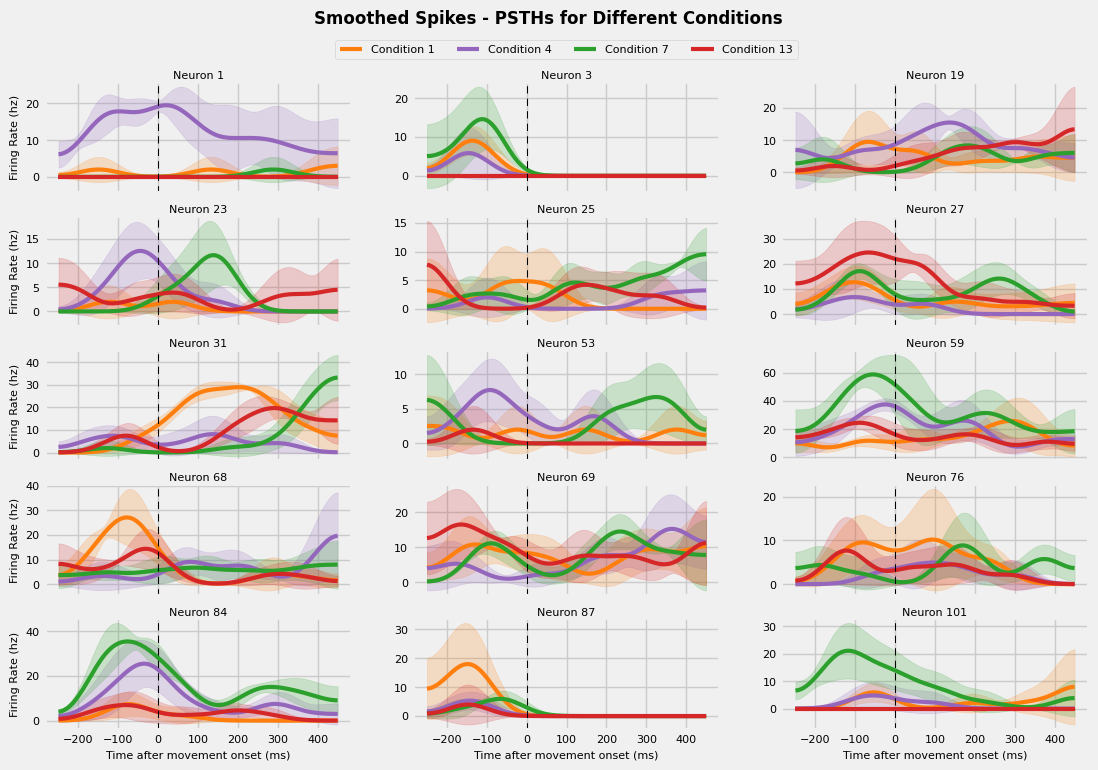

In [28]:
utils.plot_cond_avg_fr(trial_data, cond_list, neuron_list, kernel_size)

With the PSTHs we can see some clear differences in the average activity (light colored area is STD) across the example conditions. Let's verify that our model has learned a similar structure in the PSTHs. We first need to run inference on the complete training set with our trained model:

In [29]:
# put the model in evaluation mode
model.eval()
model = model.cpu()

# run inference with the model on the spikes (after adding 0s for heldout data)
bs, time, n_heldin = heldin.shape
spikes = torch.cat((heldin, torch.zeros((bs,time,35))), -1)
spikes = torch.cat((spikes, torch.zeros((bs,40,142))), 1)
rates = model(spikes).cpu().detach().numpy()

Now we can plot the PSTHs:

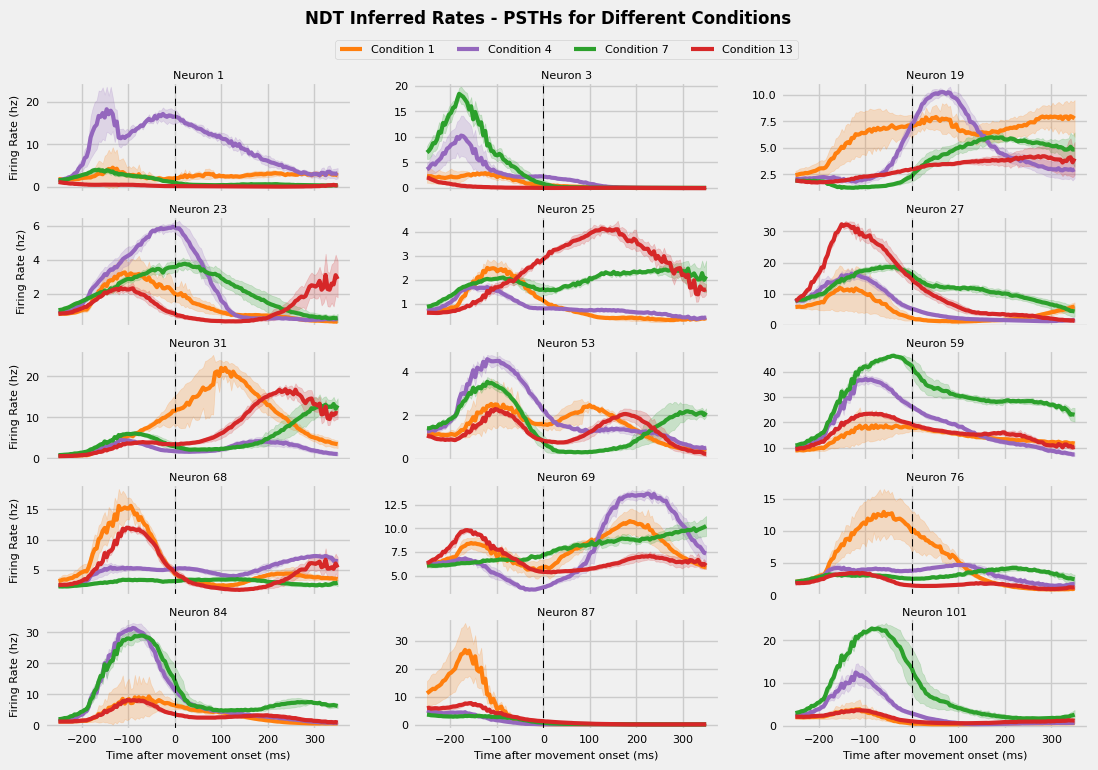

In [30]:
utils.plot_cond_avg_pred_fr(rates, conds, cond_list, neuron_list)

Wow! Our model has seemingly found similar trends as the PSTHs, but they are a lot more separated by condition. The advantage that our model has over the PSTHs though is that we dont need to condition average our estimated rates to get a clean signal. This is especially useful in applications such as BCIs when we need to instanly predict an intended velocity.

Let's see what single single trial smoothed spikes like and take a second see if the relationships we indentified above would still be visible if we were trying to predict which condition the monkey is in just using the single trial firing rates (smoothed spikes):

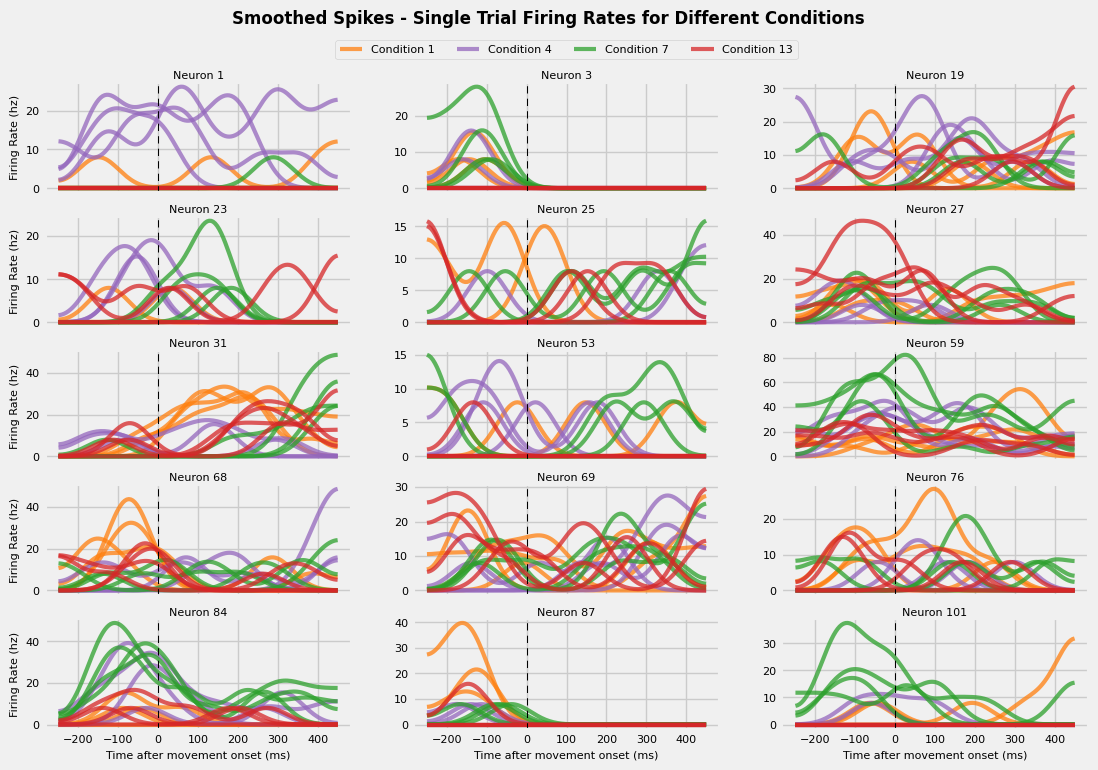

In [31]:
utils.plot_st_fr(trial_data, cond_list, neuron_list, kernel_size)

While there is some separability amost the traces of the different conditions, most neurons seem to give pretty similar responses across all conditions which is less than ideal for trying to decode in real-time.

Let's now take a look at the single trial firing rate estimates produced by our model:

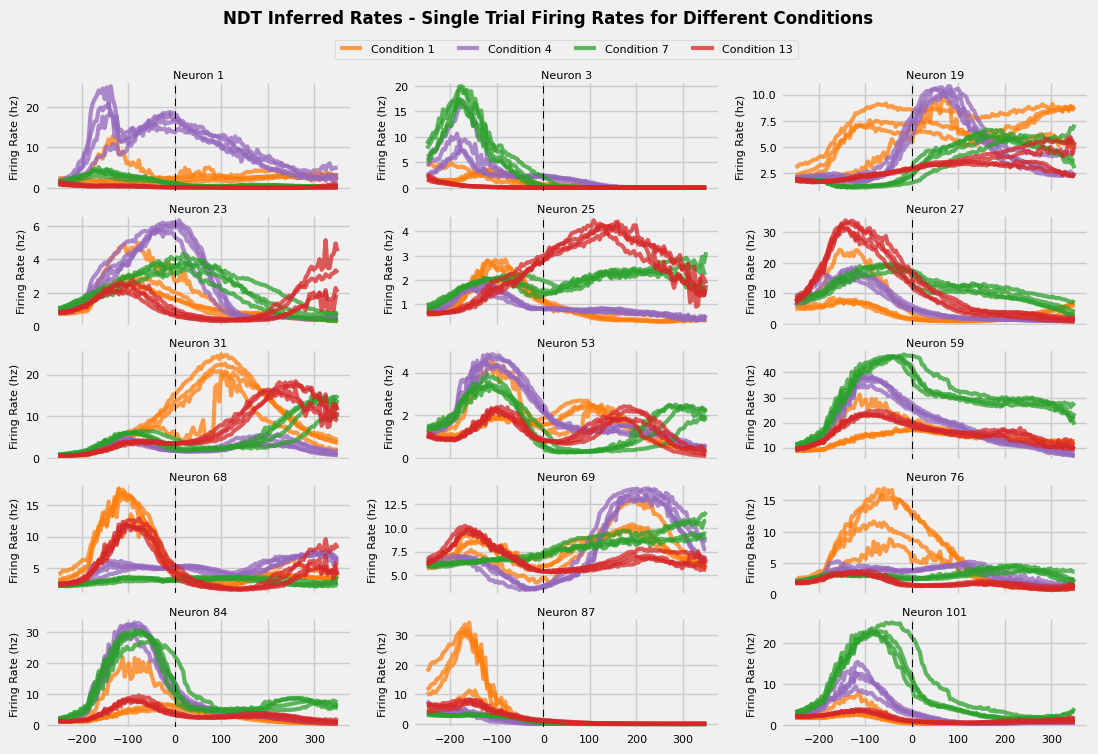

In [32]:
utils.plot_pred_st_fr(rates, conds, cond_list, neuron_list)

Wow! Even on the single trial level our model gives us very distinct responses to the different conditions. To actually get an estimate of the improvements we can get over smoothed spikes, let's evaluate our model on the validation set (unseen while training) using functions from `nlb_tools`.

#### **Validation set evaluation**

First run inference with the model on both the training and validation sets:

In [33]:
# Retrieve inputs for submission from dataset
(training_input, training_output, eval_input, tlen, num_heldin) = utils.get_submission_inputs(dataset, 'train_val')

# Set model to evaluation mode and move to CPU
model.eval()
model = model.cpu()

# Get tensor shape, append zeros to increase last dimension by 35 and make predictions
bs, time, heldin = training_input.shape
spikes = torch.cat((training_input, torch.zeros((bs,time,35))), -1)
training_predictions = model(spikes).cpu().detach().numpy()

# Repeat previous steps for evaluation input
bs, time, heldin = eval_input.shape
spikes = torch.cat((eval_input, torch.zeros((bs,time,35))), -1)
eval_predictions = model(spikes).cpu().detach().numpy()

We will now evaluate how well the model does on the validation set:

In [34]:
# Prepare submission data
submission = {
    'mc_maze_small': {
        'train_rates_heldin': training_predictions[:, :tlen, :num_heldin],
        'train_rates_heldout': training_predictions[:, :tlen, num_heldin:],
        'eval_rates_heldin': eval_predictions[:, :tlen, :num_heldin],
        'eval_rates_heldout': eval_predictions[:, :tlen, num_heldin:],
        'eval_rates_heldin_forward': eval_predictions[:, tlen:, :num_heldin],
        'eval_rates_heldout_forward': eval_predictions[:, tlen:, num_heldin:]
    }
}
target_dict = make_eval_target_tensors(dataset=dataset,
                                       dataset_name='mc_maze_small',
                                       train_trial_split='train',
                                       eval_trial_split='val',
                                       include_psth=True,
                                       save_file=False)

evaluate(target_dict, submission)

[{'mc_maze_scaling_split': {'[100] co-bps': 0.213968910955021,
   '[100] vel R2': 0.7390736652760321,
   '[100] psth R2': 0.3374700526545358,
   '[100] fp-bps': -0.11739537590314011}}]

<p align = "justify">Cool! but what do those numbers even mean? Well to get a sense of how you are doing on the test set, take a look at how you compare to the leaderboard rankings for the <code>mc_maze_small</code> dataset (you should look for the columns that have <code>[100]</code> on them) on <a href="https://eval.ai/web/challenges/challenge-page/1256/leaderboard/3184">EvalAI</a>.</p>

Let's briefly go over what each of the metrics mean,

- <p align = "justify"><b>Co-BPS</b>: Co-BPS assess the performance of predicting the firing rates of a subset of channels based on the activity of other channels, using a metric called bits per spike, which assumes a Poisson likelihood model.</p>

- <p align = "justify"><b>Vel $R^2$</b>: Velocity $R^2$ involves the use of ridge regression to map rate predictions of all channels to various behavioral metrics such as hand or finger velocity or neural trajectory speed, evaluated using the R^2 metric.</p>

- <p align = "justify"><b>PSTH R</b>2: PSTH R2 calculates the R^2 metric between test split rate predictions and empirical Peri-Stimulus Time Histograms (PSTHs), which are generated by averaging smoothed spikes from all trials excluding the one being evaluated, with conditions varying based on the dataset.</p>

- <p align = "justify"><b>FP-BPS</b>: FP-BPS measures a model's ability to predict future dynamics by assessing rate predictions for the next 200 milliseconds following the provided test split trial segments, using the same bits per spike calculation as in Co-BPS.</p>

#### **Test set evaluation**

Up until now we have just looked at the quality of the model on the validation set, but the true test of the model is how well it can generalize to unseen data. This is dont by comparing models on the [NLB public leaderboard](https://eval.ai/web/challenges/challenge-page/1256/leaderboard/3184).

To submit out model to the NLB we need to run the code below. This will do the same thing that we did above, but now we are also running inference on the test dataset.

In [35]:
# Retrieve inputs for submission from dataset
(training_input, training_output, eval_input, tlen, num_heldin) = utils.get_submission_inputs(dataset, 'test')

# Set model to evaluation mode and move to CPU
model.eval()
model = model.cpu()

# Get tensor shape, append zeros to increase last dimension by 35 and make predictions
bs, time, heldin = training_input.shape
spikes = torch.cat((training_input, torch.zeros((bs,time,35))), -1)
training_predictions = model(spikes).cpu().detach().numpy()

# Repeat previous steps for evaluation input
bs, time, heldin = eval_input.shape
spikes = torch.cat((eval_input, torch.zeros((bs,time,35))), -1)
eval_predictions = model(spikes).cpu().detach().numpy()

# Prepare submission data
submission = {
    'mc_maze_small': {
        'train_rates_heldin': training_predictions[:, :tlen, :num_heldin],
        'train_rates_heldout': training_predictions[:, :tlen, num_heldin:],
        'eval_rates_heldin': eval_predictions[:, :tlen, :num_heldin],
        'eval_rates_heldout': eval_predictions[:, :tlen, num_heldin:],
        'eval_rates_heldin_forward': eval_predictions[:, tlen:, :num_heldin],
        'eval_rates_heldout_forward': eval_predictions[:, tlen:, num_heldin:]
    }
}

# Save the submission to disk so that we can submit to EvalAI
from nlb_tools.make_tensors import save_to_h5
save_to_h5(submission, 'submission.h5', overwrite=True)

If you are interested in submitting your model to the leaderboard (private submissions are allowed!) first create an account on [EvalAI](https://eval.ai/auth/signup). Then download the `submission.h5` file that should be stored in your google colab `contents/` folder. Then, you can go [here](https://eval.ai/web/challenges/challenge-page/1256/submission) to submit the model. Select the "Test Phase" and upload the `submission.h5` file. You can go [here](https://eval.ai/web/challenges/challenge-page/1256/my-submission) to look at how your model did by looking at the "Result file" after your models evaluation is done.

And now here is the test set performance for the model that I created using this notebook:
<br>

<img src="https://raw.githubusercontent.com/domenick-m/Caltech_DSAINSS_23/main/Images/NLB%20rankings.png" alt="inputs" width="700"/>

We can see that this model does decently when compared to the orginal NDT submission for this dataset on EvalAI. And this was with no hyperparameter tuning / searches and a small number of epochs (relative to the 50,000 max epochs for the [Neural Latents NDT](https://github.com/snel-repo/neural-data-transformers/blob/98dd85a24885ffb76adfeed0c2a89d3ea3ecf9d1/configs/mc_maze_small.yaml#L25)).

<br></br>
#### **Next Steps:**
The next steps are up to you! You could try changing the hyperparameters of the model and retraining it to see if you can get an even higher score on the leaderboard. Another option is to try with your own data, the genral principle of attention and the transformer architecture can be applied out of the box to many neuroscience problems like it was here today.


---

Done!